3) In the first cell of your notebook, import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4) Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv') 

4) Take a look at the first 10 rows.

In [3]:
gdp_df.head(10) 

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


4) Look at the last 5 rows. Do you see a problem?

In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,NaN,NaN,NaN,NaN
6869,footnoteSeqID,Footnote,NaN,NaN
6870,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


4) Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [5]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows = 6868) 

5) Drop the 'Value Footnotes' column.

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes']) 

5) Rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

6) How many rows and columns does gdp_df have? What are the data types of its columns? 

In [8]:
print(gdp_df.shape)

(6868, 3)


In [9]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


6) If any of the columns are not the expected types, figure out why and fix it.

7) Which years are represented in this dataset? 

In [11]:
gdp_df['Year'].min()

1990

In [12]:
gdp_df['Year'].max()

2019

7) Take a look at the number of observations per year. What do you notice?

In [13]:
gdp_df['Year'].value_counts().sort_index()

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

The # of observations has moderately increased over time and drops off slightly in 2019.

8) How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [14]:
gdp_df['Country'].nunique()

238

There are 238 countries in the data set. The least represented countries are Island nations and African nations. They likely have so few observations because they have limited economic infrastructure and government agencies to do this work.

9) Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [15]:
gdp_2014 = gdp_df[gdp_df.Year.isin(['2014'])]

In [16]:
# michael's code - gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

10) Use .describe() to find the summary statistics for GDP per capita in 2014.

In [17]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710347
std       20983.869621
min         822.610458
25%        4753.110935
50%       12209.385755
75%       26803.610475
max      156514.133800
Name: GDP_Per_Capita, dtype: float64

Observations: 
Mean is higher than the median. More high values or skewed. Possibly outliers. Possibly skewed to the right.
Mean is smaller than the standard deviation => may be skewed.
Max value is 6 or 7 standard deviations above average so likely an outlier.

11) Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

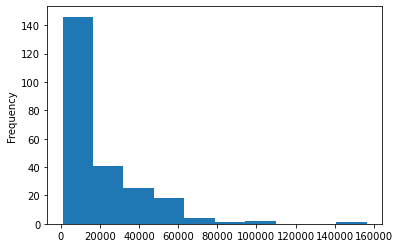

In [18]:
gdp_2014['GDP_Per_Capita'].plot(kind = 'hist');

11) How would you describe the shape of the distribution? I would describe it as a right tail

12) Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [19]:
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.13380
3691,Luxembourg,2014,108760.91600
5138,Qatar,2014,95578.41697
5464,Singapore,2014,87808.66316
561,Bermuda,2014,77361.10488


In [20]:
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


13) Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [21]:
gdp_df.pivot_table(index='Country', values='GDP_Per_Capita', columns='Year')

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1957.029338,1904.559799,2075.491747,2116.465454,2102.385234,2068.265904,2057.062164,2058.383832,2033.779002,2065.036398
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10783.816180,11088.087800,11263.851340,11397.576230,11623.866680,11916.422310,12331.127750,12811.759440,13366.303060,13724.058790
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10970.705150,11078.240520,11233.534930,11319.097950,11512.705410,11696.963760,11826.164670,11737.409350,11642.194490,11510.557090
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297
Antigua and Barbuda,15459.551680,15586.896170,15497.464740,15991.764200,16697.248770,15628.396990,16303.723890,16828.640820,17258.964860,17551.305970,...,18205.985370,17604.417100,17965.502330,17641.542530,18104.241470,18595.084900,19417.964820,19840.076120,21115.798270,21910.184990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,7586.384939,8041.178551
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205463,4047.128464,3916.925781,4294.746119,4786.480266,5052.064101,...,5411.066482,5782.689593,5985.683247,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6219.960291
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967710,10396.385330,10508.291270,10731.543650,...,13904.629130,14275.461870,14554.850130,14857.762340,15189.648510,15516.986520,15837.382960,16253.385520,16636.415940,16911.193290


In [22]:
gdp_pivoted = (
    gdp_df
    [gdp_df['Year'].isin([1990,2017])]
    .pivot_table(
        values = 'GDP_Per_Capita',
        index = 'Country',
        columns = 'Year'
    )
    .dropna()
)

In [23]:
gdp_pivoted.head(5)

Year,1990,2017
Country,,
Albania,4842.734635,12811.759440
Algeria,8746.352901,11737.409350
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551680,19840.076120
Arab World,9694.667544,14555.474920


14) Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [24]:
gdp_pivoted['Percent_Change'] = (gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990] * 100

In [25]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759440,164.556297
Algeria,8746.352901,11737.409350,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551680,19840.076120,28.335391
Arab World,9694.667544,14555.474920,50.138980


In [26]:
type(gdp_pivoted)

pandas.core.frame.DataFrame

15) How many countries experienced a negative percent change in GDP per capita from 1990 to 2017? 17

In [27]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0].count()

Year
1990              17
2017              17
Percent_Change    17
dtype: int64

In [28]:
#gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape[]

17 Countries had negative percent change in GDP from 1990 - 2017

16) Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [29]:
top_pc = gdp_pivoted.nlargest(2, 'Percent_Change').index[0]
second_pc = gdp_pivoted.nlargest(2, 'Percent_Change').index[1]

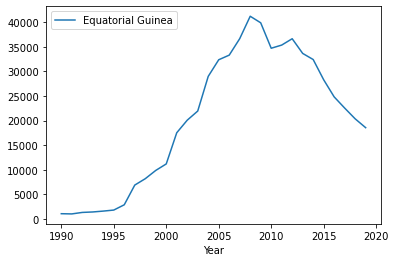

In [30]:
gdp_df[gdp_df['Country'] == top_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = top_pc);

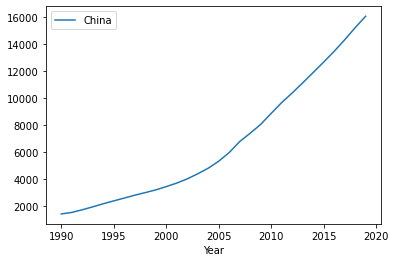

In [31]:
gdp_df[gdp_df['Country'] == second_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = second_pc);

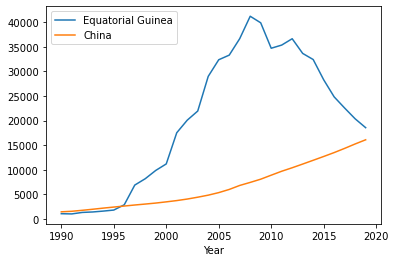

In [32]:
ax = gdp_df[gdp_df['Country'] == top_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = top_pc)
gdp_df[gdp_df['Country'] == second_pc].plot(x = 'Year',
                                            y = 'GDP_Per_Capita',
                                            label = second_pc,
                                           ax = ax);

17) Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [33]:
continents_df = pd.read_csv('../data/continents.csv')

18) Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [34]:
gdp_df = pd.merge(gdp_df, continents_df, left_on = ['Country'], right_on = ['Country'], how = 'inner')

In [35]:
gdp_df.shape

(5443, 4)

19) Determine the number of countries per continent. Create a bar chart showing this.

<AxesSubplot:xlabel='Continent'>

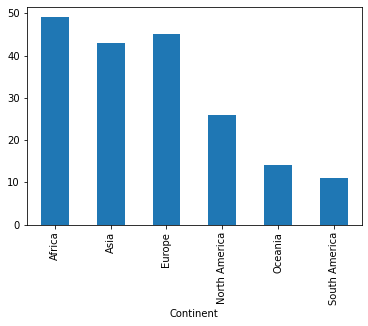

In [36]:
gdp_df.groupby("Continent")["Country"].nunique().plot(kind='bar')

20) Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [37]:
GDP_2014_by_Continent = gdp_df[gdp_df.Year.isin(['2014'])]

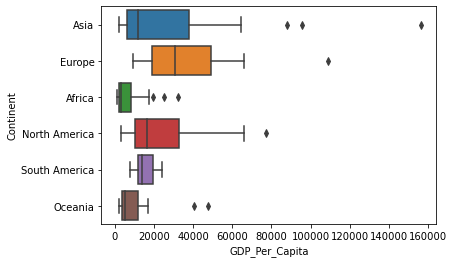

In [38]:
sns.boxplot(x=GDP_2014_by_Continent['GDP_Per_Capita'], y=GDP_2014_by_Continent['Continent']);
plt.show()

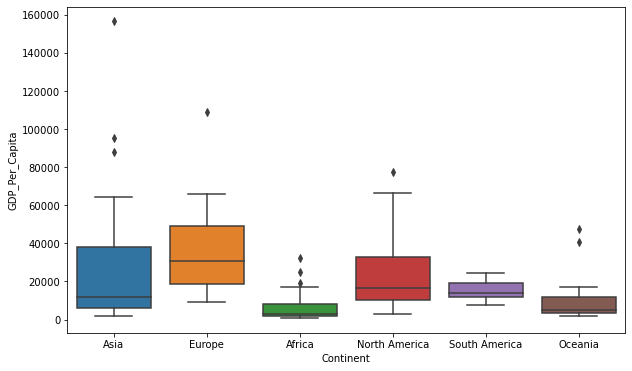

In [39]:
#Michael's answer
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(
    data = gdp_df[gdp_df['Year'] == 2014],
    x = 'Continent',
    y = 'GDP_Per_Capita',
    ax = ax
);

21) Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy.

In [40]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4570379.csv', header = 2) 

In [41]:
life_expectancy.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


22) Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [42]:
life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])

In [43]:
life_expectancy = life_expectancy.melt(id_vars='Country Name', var_name='Year', value_name='Life_Expectancy')

23) What was the first country with a life expectancy to exceed 80?

In [44]:
life_expectancy.head(2)

,Country Name,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053


In [45]:
life_expectancy = life_expectancy.rename(columns = {'Country Name': 'Country'})

In [46]:
life_expectancy[life_expectancy['Life_Expectancy'] > 80].sort_values('Year').head(1)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244


In [47]:
life_expectancy[life_expectancy['Life_Expectancy']>80].iloc[0]['Country']

'Japan'

24) Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [48]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia


In [49]:
life_expectancy.head(2)

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053


In [50]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5443 non-null   object 
 1   Year            5443 non-null   int64  
 2   GDP_Per_Capita  5443 non-null   float64
 3   Continent       5443 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


In [51]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int)

In [52]:
gdp_le = pd.merge(
    left = gdp_df,
    right = life_expectancy,
)

25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

In [53]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019]
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
18,Albania,2019,13724.058790,Europe,78.573
48,Algeria,2019,11510.557090,Africa,76.880
78,Angola,2019,6670.332297,Africa,61.147
108,Antigua and Barbuda,2019,21910.184990,North America,77.016
...,...,...,...,...,...
4968,Vanuatu,2019,3153.015168,Oceania,70.474
4998,Vietnam,2019,8041.178551,Asia,75.400
5028,West Bank and Gaza,2019,6219.960291,Asia,74.053
5054,Zambia,2019,3470.448801,Africa,63.886


In [54]:
(gdp_le_2019['Life_Expectancy'] >= 80).sum()

33

26) Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [55]:
top_3_gdp = gdp_le_2019.nlargest(3, 'GDP_Per_Capita')['Country'].to_list()
top_3_gdp

['Macao SAR, China', 'Luxembourg', 'Singapore']

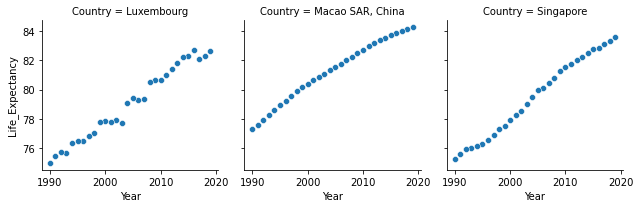

In [56]:
g = sns.FacetGrid(data = gdp_le[gdp_le['Country'].isin(top_3_gdp)],
             col = 'Country')
g.map(sns.scatterplot, 'Year', 'Life_Expectancy');

27) Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

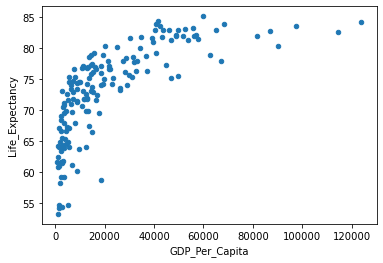

In [57]:
gdp_le_2019.plot(kind = 'scatter', x = 'GDP_Per_Capita', y = 'Life_Expectancy');

28) Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [58]:
gdp_le_2019[['GDP_Per_Capita', 'Life_Expectancy']].corr()

,GDP_Per_Capita,Life_Expectancy
GDP_Per_Capita,1.000000,0.709018
Life_Expectancy,0.709018,1.000000


Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [59]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

<ipython-input-59-ae3e2b0ca4b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])


In [60]:
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_gdp
0,Afghanistan,2019,2065.036398,Asia,64.833,7.632903
18,Albania,2019,13724.058790,Europe,78.573,9.526906
48,Algeria,2019,11510.557090,Africa,76.880,9.351020
78,Angola,2019,6670.332297,Africa,61.147,8.805425
108,Antigua and Barbuda,2019,21910.184990,North America,77.016,9.994707
...,...,...,...,...,...,...
4968,Vanuatu,2019,3153.015168,Oceania,70.474,8.056114
4998,Vietnam,2019,8041.178551,Asia,75.400,8.992331
5028,West Bank and Gaza,2019,6219.960291,Asia,74.053,8.735519
5054,Zambia,2019,3470.448801,Africa,63.886,8.152039


In [61]:
gdp_le_2019.corr()

,Year,GDP_Per_Capita,Life_Expectancy,log_gdp
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.709018,0.850396
Life_Expectancy,NaN,0.709018,1.000000,0.848498
log_gdp,NaN,0.850396,0.848498,1.000000


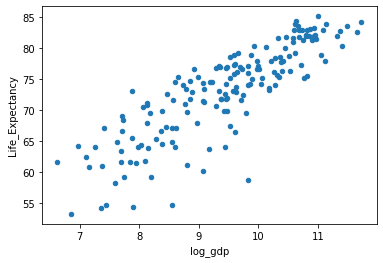

In [62]:
gdp_le_2019.plot(kind = 'scatter', x = 'log_gdp', y = 'Life_Expectancy');

The log scatter plot is more linear.

Solo Exploration and Presentation:
Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find.

In [63]:
mobile_phone_percent_usage = pd.read_excel('../data/mobile_percentage_use.xls')

In [64]:
mobile_phone_percent_usage = mobile_phone_percent_usage.drop(labels=[0,1,2], axis=0)

In [65]:
mobile_phone_percent_usage = mobile_phone_percent_usage.drop(columns = ['Core Household Indicators', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',  'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 32'])

In [66]:
mobile_phone_percent_usage.head(2)

,Unnamed: 1,Unnamed: 31,Unnamed: 33
3,Afghanistan,...,NaN
4,Albania,...,NaN


In [67]:
mobile_phone_percent_usage.columns = ['Country', 'Percentage of Individuals Using a Mobile Phone', 'Year']

In [68]:
mobile_phone_percent_usage.head(2)

,Country,Percentage of Individuals Using a Mobile Phone,Year
3,Afghanistan,...,NaN
4,Albania,...,NaN


In [69]:
mobile_phone_percent_usage.tail(2)

,Country,Percentage of Individuals Using a Mobile Phone,Year
204,NaN,NaN,NaN
205,NaN,NaN,NaN


In [70]:
second_column = mobile_phone_percent_usage.pop('Year')
mobile_phone_percent_usage.insert(1, 'Year', second_column)

In [71]:
mobile_phone_percent_usage.head(2)

,Country,Year,Percentage of Individuals Using a Mobile Phone
3,Afghanistan,NaN,...
4,Albania,NaN,...


In [72]:
mobile_phone_percent_usage = mobile_phone_percent_usage.dropna()

In [73]:
mobile_phone_percent_usage.head(2)

,Country,Year,Percentage of Individuals Using a Mobile Phone
12,Austria,2012,92.7
13,Azerbaijan,2011,83.3


In [74]:
mobile_phone_percent_usage.tail(2)

,Country,Year,Percentage of Individuals Using a Mobile Phone
187,United Kingdom,2012,94.2
189,Uruguay,2012,71.6


In [75]:
mobile_phone_percent_usage.dtypes

Country                                           object
Year                                              object
Percentage of Individuals Using a Mobile Phone    object
dtype: object

In [76]:
mobile_phone_percent_usage['Percentage of Individuals Using a Mobile Phone'] = mobile_phone_percent_usage['Percentage of Individuals Using a Mobile Phone'].astype(float)

In [77]:
mobile_phone_percent_usage.nlargest(5, 'Percentage of Individuals Using a Mobile Phone')

,Country,Year,Percentage of Individuals Using a Mobile Phone
142,Qatar,2013,99.8
186,United Arab Emirates,2012,99.8
132,Norway,2012,99.3
62,Finland,2012,98.8
79,Iceland,2012,97.8


In [78]:
top_5_mobile_phone = mobile_phone_percent_usage[mobile_phone_percent_usage.Country.isin(['Qatar', 'United Arab Emirates', 'Norway', 'Finland', 'Iceland'])]

In [79]:
top_5_mobile_phone.head()

,Country,Year,Percentage of Individuals Using a Mobile Phone
62,Finland,2012,98.8
79,Iceland,2012,97.8
132,Norway,2012,99.3
142,Qatar,2013,99.8
186,United Arab Emirates,2012,99.8


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x00000184F5570760>>

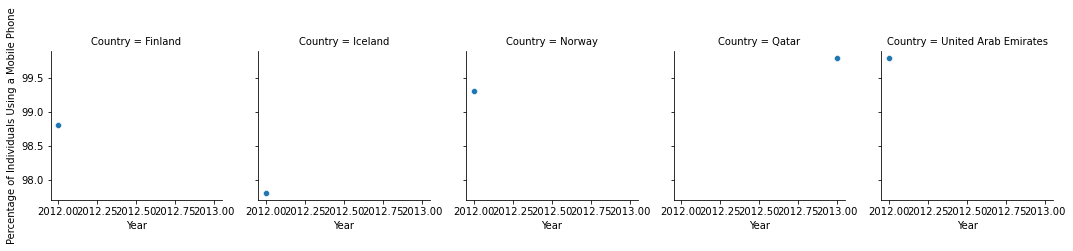

In [80]:
g = sns.FacetGrid(top_5_mobile_phone, col='Country')
g.map(sns.scatterplot, 'Year', 'Percentage of Individuals Using a Mobile Phone')
g.add_legend

In [81]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia


In [82]:
gdp_df = gdp_df.drop(columns = ['Continent']) 

In [83]:
gdp_df_mobile_phone = pd.merge(gdp_df, mobile_phone_percent_usage, left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], how = 'outer')

In [84]:
gdp_df_mobile_phone.head(2)

,Country,Year,GDP_Per_Capita,Percentage of Individuals Using a Mobile Phone
0,Afghanistan,2019.0,2065.036398,NaN
1,Afghanistan,2018.0,2033.779002,NaN


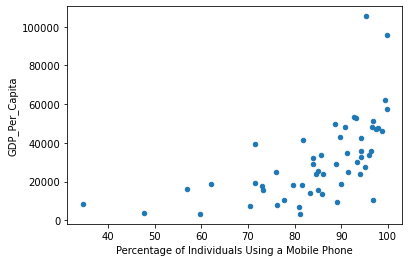

In [85]:
gdp_df_mobile_phone.plot(kind = 'scatter', x = 'Percentage of Individuals Using a Mobile Phone', y = 'GDP_Per_Capita');

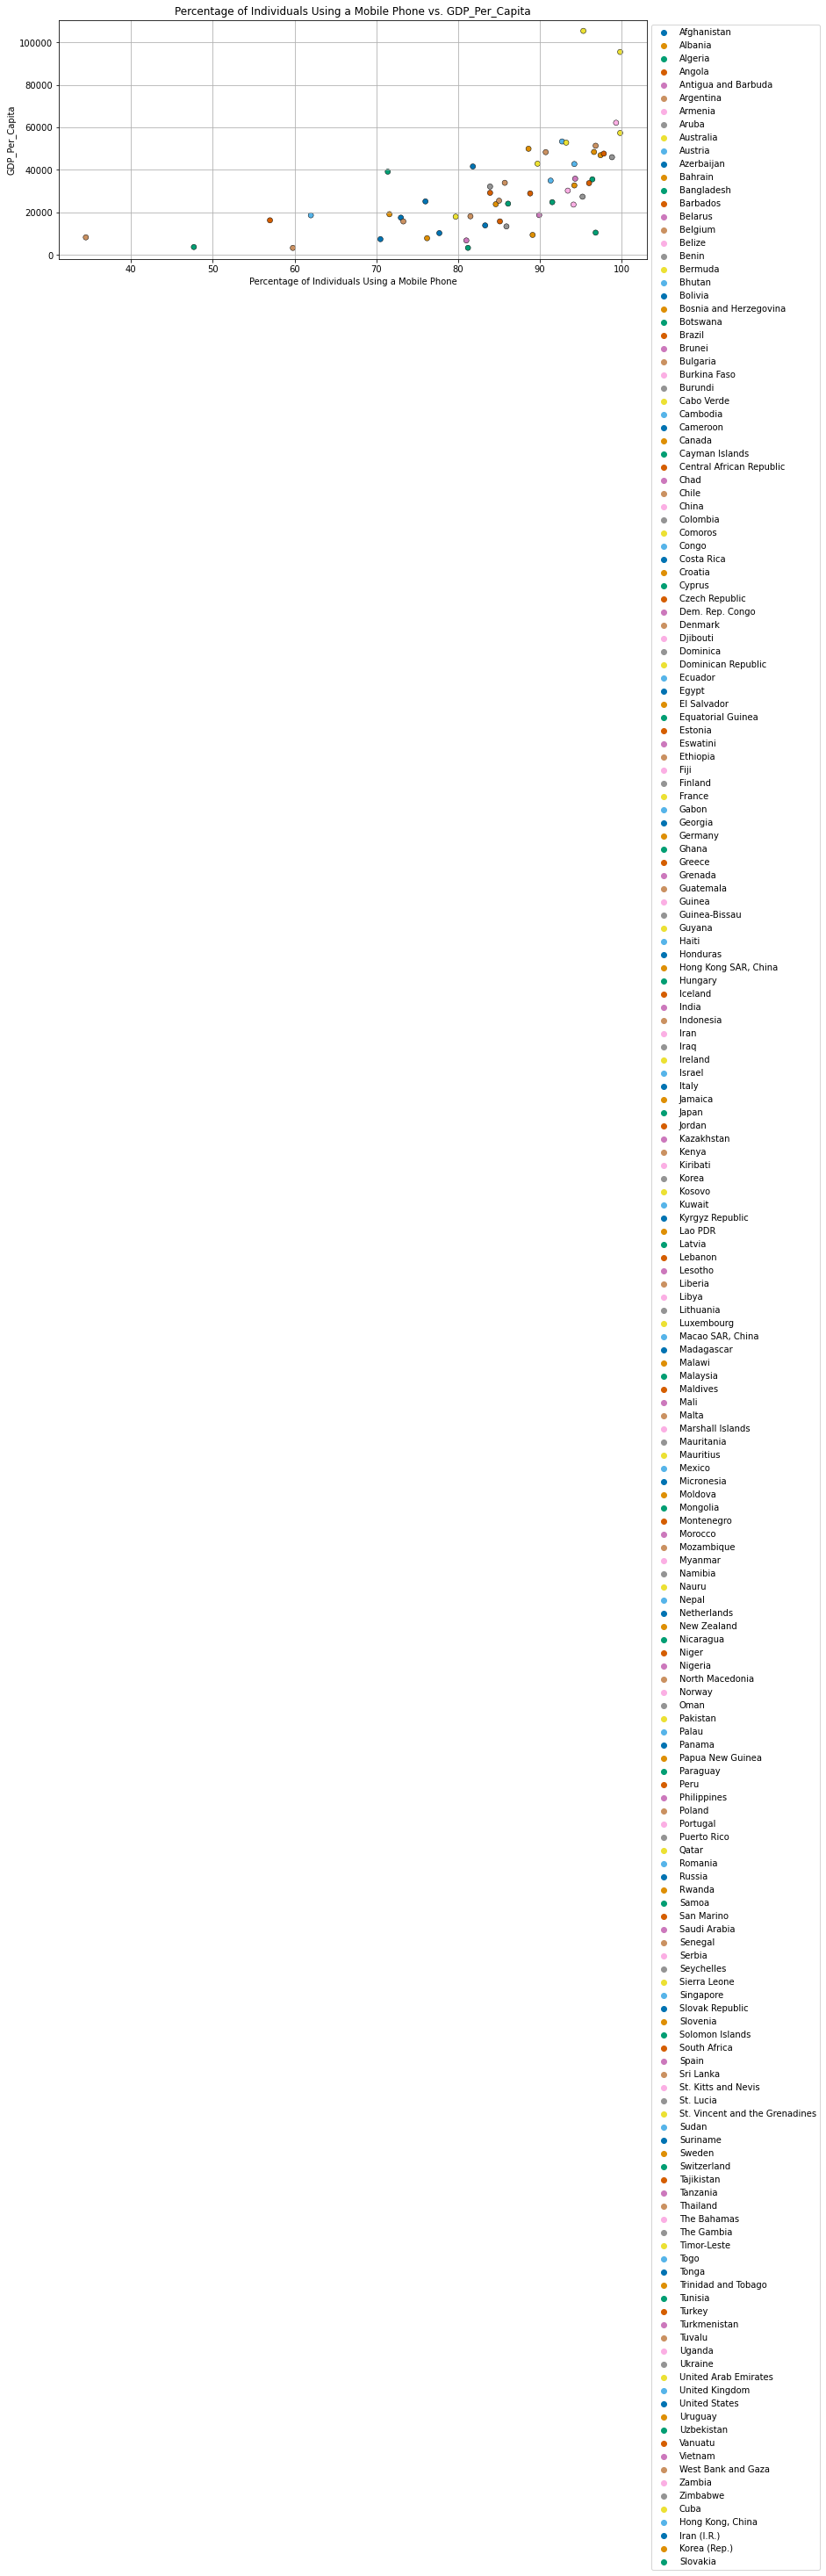

In [86]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = gdp_df_mobile_phone, x = 'Percentage of Individuals Using a Mobile Phone', y = 'GDP_Per_Capita',
hue = 'Country', palette = 'colorblind', edgecolor = 'black')
plt.title('Percentage of Individuals Using a Mobile Phone vs. GDP_Per_Capita')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));

In [87]:
gdp_df_mobile_phone.corr()

,Year,GDP_Per_Capita,Percentage of Individuals Using a Mobile Phone
Year,1.000000,0.135126,0.149804
GDP_Per_Capita,0.135126,1.000000,0.588856
Percentage of Individuals Using a Mobile Phone,0.149804,0.588856,1.000000


In [88]:
new_businesses_df = pd.read_csv('../data/new_businesses.csv')

In [89]:
new_businesses_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,4274,NaN
1,Afghanistan,2017,3022,NaN


In [90]:
new_businesses_df = new_businesses_df.drop(columns = ['Value Footnotes']) 

In [91]:
new_businesses_df.columns = ['Country', 'Year', '# of New Businesses Registered']

In [92]:
new_businesses_df.head(2)

,Country,Year,# of New Businesses Registered
0,Afghanistan,2018,4274
1,Afghanistan,2017,3022


In [93]:
gdp_mobile_phone_new_businesses = pd.merge(gdp_df_mobile_phone, new_businesses_df, left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], how = 'outer')

In [94]:
gdp_mobile_phone_new_businesses.head(2)

,Country,Year,GDP_Per_Capita,Percentage of Individuals Using a Mobile Phone,# of New Businesses Registered
0,Afghanistan,2019.0,2065.036398,NaN,NaN
1,Afghanistan,2018.0,2033.779002,NaN,4274.0


In [95]:
gdp_mobile_phone_new_businesses = gdp_mobile_phone_new_businesses.dropna()

In [96]:
third_column = gdp_mobile_phone_new_businesses.pop('Percentage of Individuals Using a Mobile Phone')
gdp_mobile_phone_new_businesses.insert(2, 'Percentage of Individuals Using a Mobile Phone', third_column)

In [97]:
gdp_mobile_phone_new_businesses.head()

,Country,Year,Percentage of Individuals Using a Mobile Phone,GDP_Per_Capita,# of New Businesses Registered
263,Austria,2012.0,92.7,53391.03240,3058.0
294,Azerbaijan,2011.0,83.3,13905.24576,4174.0
322,Bahrain,2013.0,97.4,46930.83073,1433.0
412,Belarus,2013.0,89.9,18760.16352,8983.0
443,Belgium,2012.0,90.7,48363.93825,21790.0


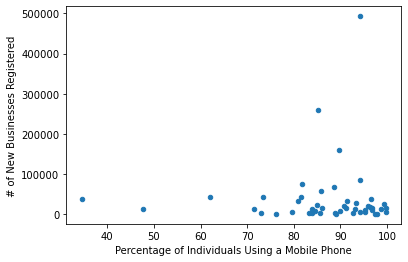

In [98]:
gdp_mobile_phone_new_businesses.plot(kind = 'scatter', x = 'Percentage of Individuals Using a Mobile Phone' , y = '# of New Businesses Registered');

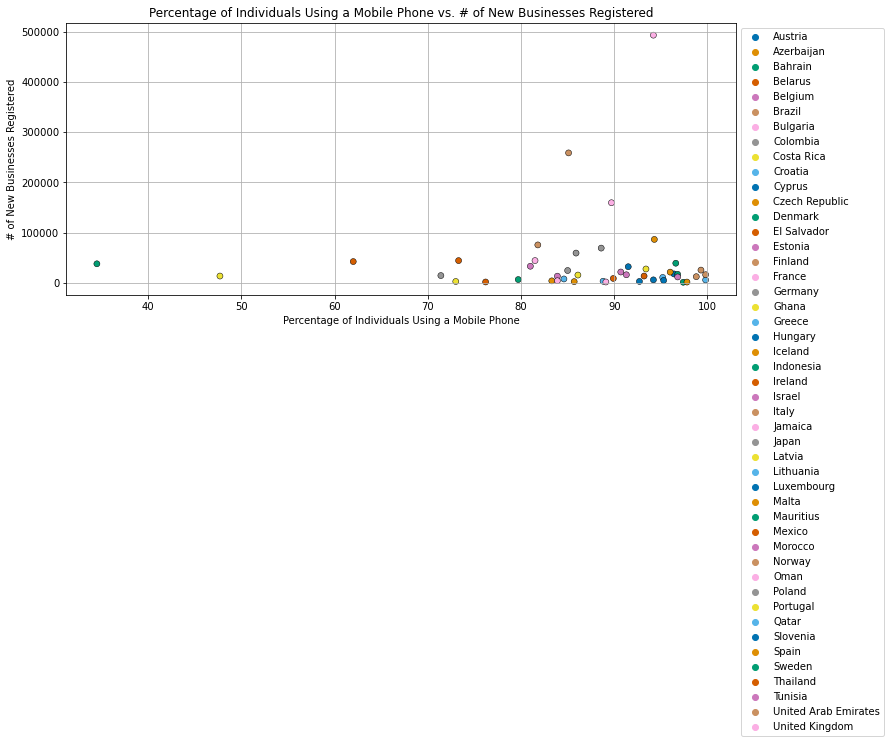

In [99]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = gdp_mobile_phone_new_businesses, x = 'Percentage of Individuals Using a Mobile Phone', y = '# of New Businesses Registered',
hue = 'Country', palette = 'colorblind', edgecolor = 'black')
plt.title('Percentage of Individuals Using a Mobile Phone vs. # of New Businesses Registered')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));

In [100]:
gdp_mobile_phone_new_businesses.corr()

,Year,Percentage of Individuals Using a Mobile Phone,GDP_Per_Capita,# of New Businesses Registered
Year,1.000000,0.327113,0.029937,0.043361
Percentage of Individuals Using a Mobile Phone,0.327113,1.000000,0.553631,0.038199
GDP_Per_Capita,0.029937,0.553631,1.000000,-0.003890
# of New Businesses Registered,0.043361,0.038199,-0.003890,1.000000


In [101]:
mobile_phone_df = pd.read_csv('../data/mobile_subscriptions.csv', nrows = 8665)

In [102]:
mobile_phone_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,23423741,1.0
1,Afghanistan,2013,21588228,2.0


In [103]:
mobile_phone_df.tail(2)

,Country or Area,Year,Value,Value Footnotes
8663,Zimbabwe,1965,0,NaN
8664,Zimbabwe,1960,0,NaN


In [104]:
mobile_phone_df = mobile_phone_df.drop(columns = ['Value Footnotes']) 

In [105]:
mobile_phone_df.columns = ['Country', 'Year', '# of Mobile Phone Subscriptions']

In [106]:
mobile_phone_df.head(2)

,Country,Year,# of Mobile Phone Subscriptions
0,Afghanistan,2014,23423741
1,Afghanistan,2013,21588228


In [107]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002


In [108]:
gdp_mobile_subscriptions = pd.merge(mobile_phone_df, gdp_df, left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], how = 'outer')

In [109]:
gdp_mobile_subscriptions.head(2)

,Country,Year,# of Mobile Phone Subscriptions,GDP_Per_Capita
0,Afghanistan,2014,23423741.0,2102.385234
1,Afghanistan,2013,21588228.0,2116.465454


In [110]:
gdp_mobile_subscriptions_new_businesses = pd.merge(gdp_mobile_subscriptions, new_businesses_df, left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], how = 'outer')

In [111]:
gdp_mobile_subscriptions_new_businesses.head(2)

,Country,Year,# of Mobile Phone Subscriptions,GDP_Per_Capita,# of New Businesses Registered
0,Afghanistan,2014,23423741.0,2102.385234,2466.0
1,Afghanistan,2013,21588228.0,2116.465454,3191.0


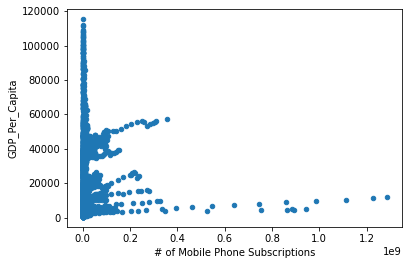

In [112]:
gdp_mobile_subscriptions_new_businesses.plot(kind = 'scatter', x = '# of Mobile Phone Subscriptions' , y = 'GDP_Per_Capita');

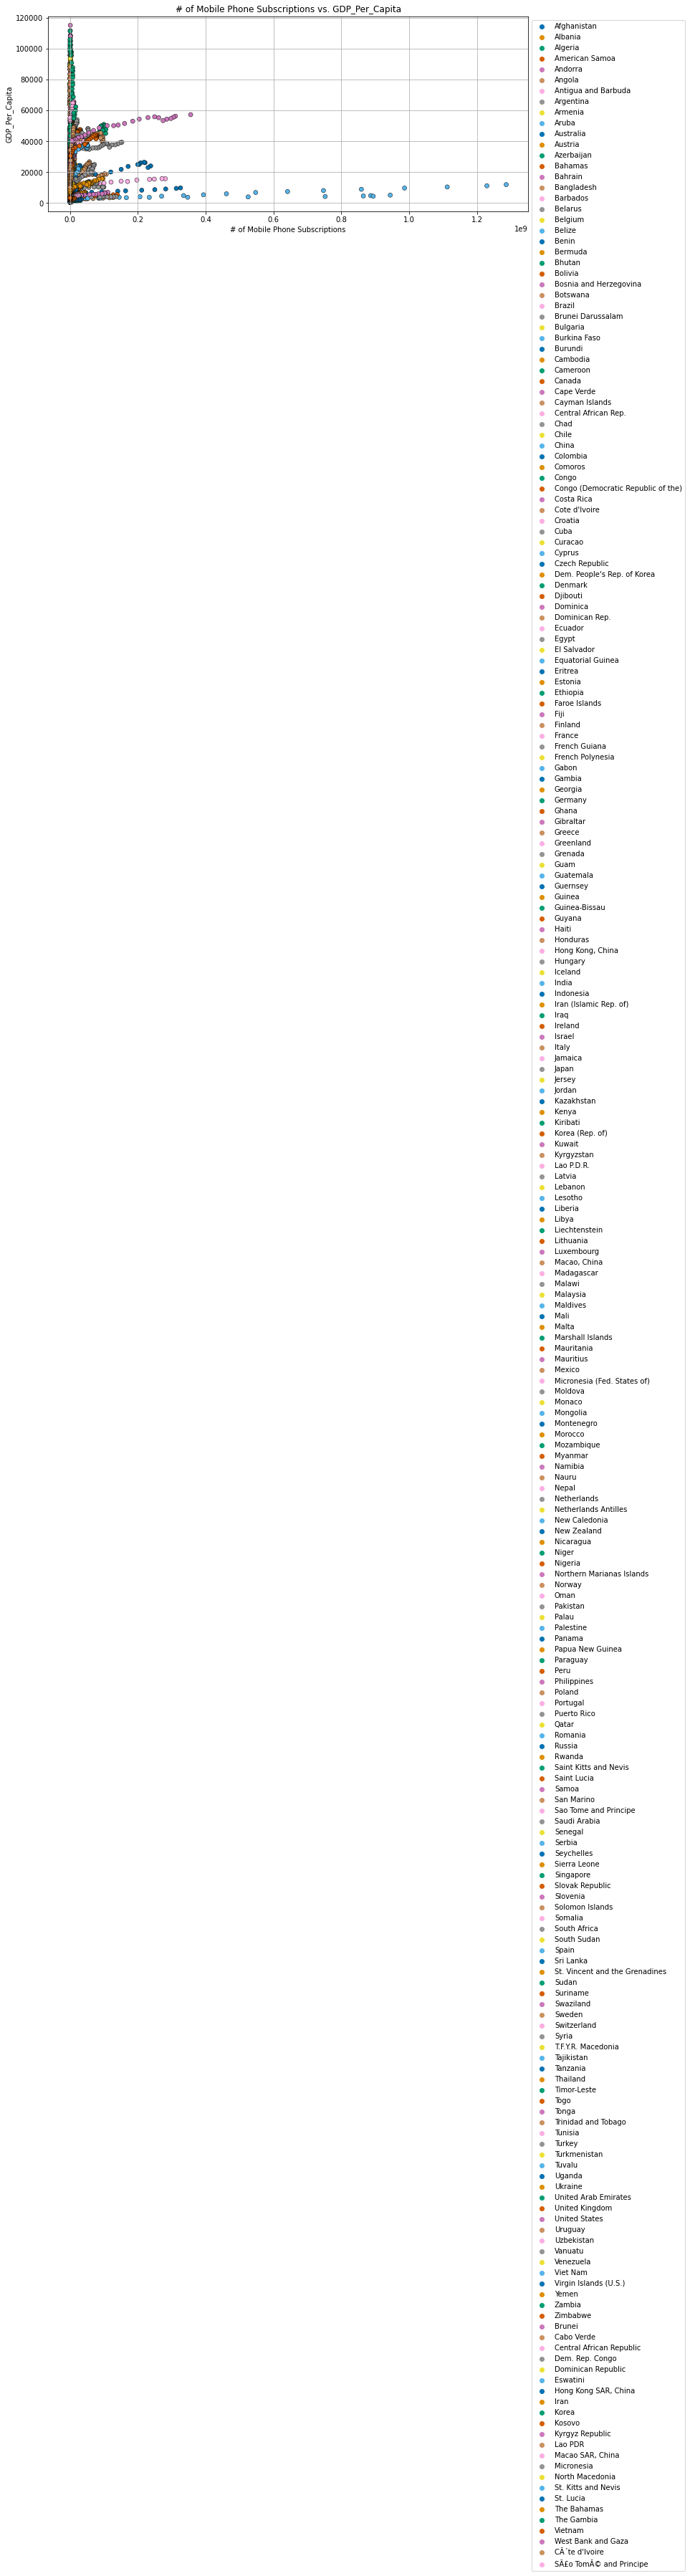

In [113]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = gdp_mobile_subscriptions_new_businesses, x = '# of Mobile Phone Subscriptions', y = 'GDP_Per_Capita',
hue = 'Country', palette = 'colorblind', edgecolor = 'black')
plt.title('# of Mobile Phone Subscriptions vs. GDP_Per_Capita')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));

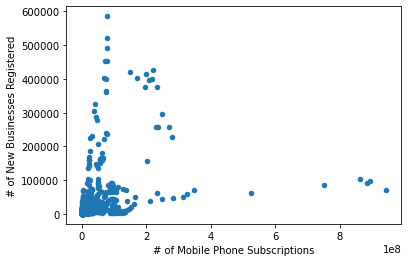

In [114]:
gdp_mobile_subscriptions_new_businesses.plot(kind = 'scatter', x = '# of Mobile Phone Subscriptions' , y = '# of New Businesses Registered');

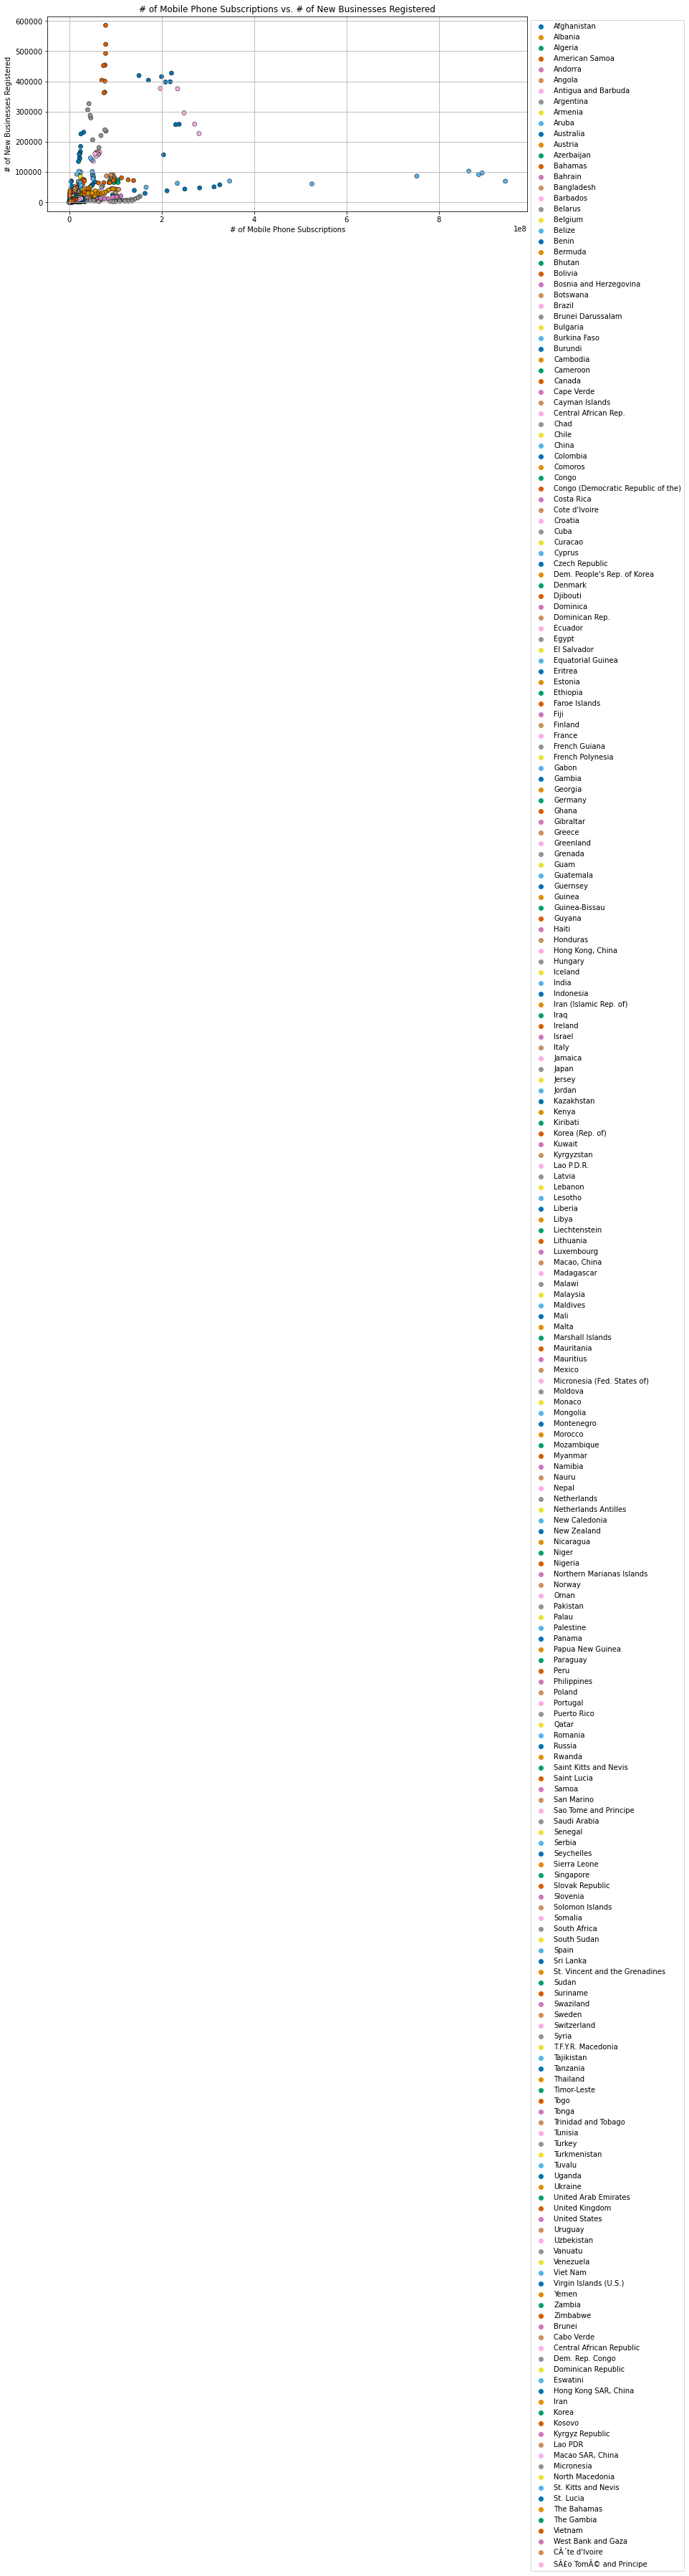

In [115]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = gdp_mobile_subscriptions_new_businesses, x = '# of Mobile Phone Subscriptions', y = '# of New Businesses Registered',
hue = 'Country', palette = 'colorblind', edgecolor = 'black')
plt.title('# of Mobile Phone Subscriptions vs. # of New Businesses Registered')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));

In [116]:
gdp_mobile_subscriptions_new_businesses.corr()

,Year,# of Mobile Phone Subscriptions,GDP_Per_Capita,# of New Businesses Registered
Year,1.000000,0.185514,0.135126,0.034498
# of Mobile Phone Subscriptions,0.185514,1.000000,0.030834,0.354676
GDP_Per_Capita,0.135126,0.030834,1.000000,0.186684
# of New Businesses Registered,0.034498,0.354676,0.186684,1.000000
